# 1.1 Imports

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Extraction was done by Barry Becker from the 1994 Census database.
# Prediction task is to determine whether a person makes over 50K a year.

# summary of algorithms run with error rates after unknown removal
# Conversion of original data as follows:
# 1. Discretized agrossincome into two ranges with threshold 50
# 2. Convert U.S. to US to avoid periods.
# 3. Convert Unknown to "?"
# 4. Run MLC++ GenCVFiles to generate data test.

# Description of fnlwgt (final weight)
# The weights on the CPS files are controlled to independent estimates of the
# civilian noninstitutional population of the US.
# Assumption: People with similar demographic characteristics should have similar # weights.  

In [4]:
# load train data
header = [
    'age','workclass','fnlwgt','education',
    'education-num','marital_status','occupation','relationship',
    'race','sex','capital_gain','capital_loss',
    'hours_per_week','native_country','target'
]

train = pd.read_csv('data/adult.data.csv',names=header)

In [5]:
# load test data
test = pd.read_csv('data/adult.test.csv',names=header)

In [6]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [7]:
# drop the first row, which contains all None
test = test.iloc[1:]

In [8]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [9]:
test.tail()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [10]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
train.tail()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
test.shape

(16281, 15)

In [13]:
train.shape

(32561, 15)

In [14]:
# train test ratio is about 2:1

# 1.2 Data Description

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16281 non-null  object 
 14  target          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [17]:
# for test data,'age' is in string

In [18]:
# convert 'age' datatype to float
test['age'] = test['age'].astype(float)

In [19]:
train.describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
test.describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [21]:
# combine the train and test data
# df = pd.concat([df,test_df])
# train and test should not be combined

# 1.3 Remove Irrelevant Observation

In [22]:
# fnlwgt is an estimate by government
# only collected data to be used
# remove 'fnlwgt'

train.drop(columns=['fnlwgt'], inplace=True)
test.drop(columns=['fnlwgt'], inplace=True)

# 1.4 Remove Duplicate Observation

In [23]:
# since education is highly correlated with education-num
# remove 'education-num'

train.drop(columns=['education-num'], inplace=True)
test.drop(columns=['education-num'], inplace=True)

# 1.5 Handle Missing Data

In [24]:
test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
1,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18.0,?,Some-college,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [25]:
# value '?' can be seen in the 5th row
# which represents missing values

In [26]:
# replace missing data (comes with " ?") with NaN

train.replace(" ?", np.nan, inplace=True)
test.replace(" ?", np.nan, inplace=True)

In [27]:
train.isnull().sum()

age                  0
workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
dtype: int64

In [28]:
test.isnull().sum()

age                 0
workclass         963
education           0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
target              0
dtype: int64

In [30]:
# impute missing values with mode

for col in ['workclass', 'occupation', 'native_country']:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

In [31]:
test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
1,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18.0,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [32]:
train.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [33]:
test.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

# 1.6 Save Cleaned Data

In [34]:
train.to_csv('data/train_cleaned.csv',index=False)

In [35]:
test.to_csv('data/test_cleaned.csv',index=False)

In [ ]:
#END

# below should be data preprocessing

# merging categorical values

In [26]:
# observe the two education col

dfx= pd.read_csv('data/adult.data.csv',names=header)

In [27]:
dfx.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
dfx['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [31]:
dfx['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [ ]:
# label encoder
# 1. doctorate
# 2. masters, prof school
# 3. bachelors
# 4. some college, assoc-acdm, assoc-voc
# 5. hs grad and others

# data engineering

In [ ]:
# col 'education'
# merging categories
# 

In [66]:
# create capital_change to summarize capital_loss & capital_gain
df['capital_change'] = df['capital-gain']-df['capital-loss']
for i in ['capital-loss','capital-gain']:
    df.drop(columns=[i], inplace=True)

In [67]:
df.target.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: target, dtype: int64

In [68]:
# encode target feature

df['target'] = df['target'].map({' <=50K': 0, ' >50K': 1,' <=50K.': 0, ' >50K.': 1})

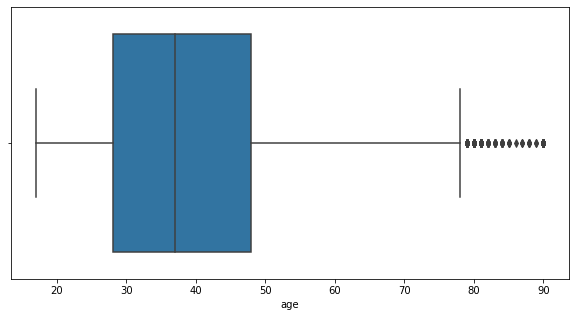

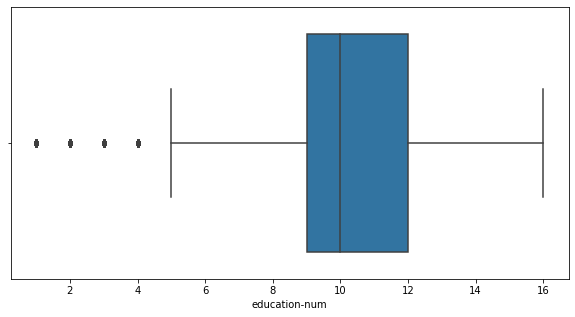

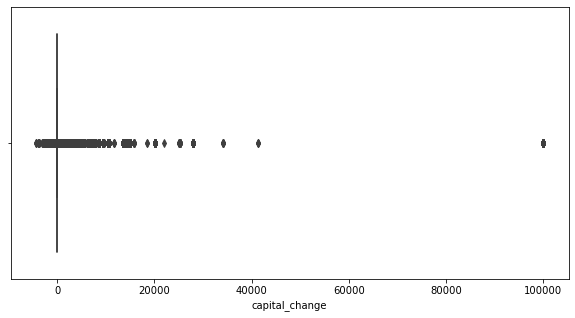

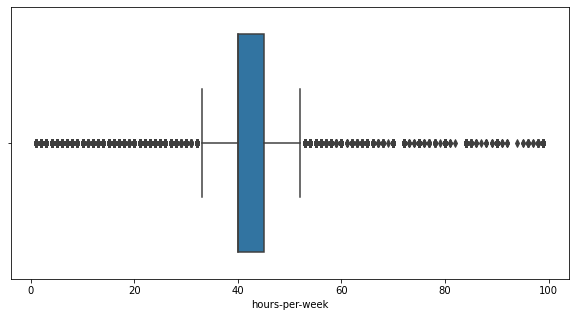

In [69]:
# outliers
features = ['age','education-num','capital_change','hours-per-week']
for i in features:
    sns.boxplot(df[i])
    plt.show()

In [70]:
# big big thanks to Matthew
# for capital_change, we can divid it into three ordinal categories



In [71]:
#from scipy import stats
#from sklearn.compose import ColumnTransformer, make_column_transformer
#from sklearn.pipeline import Pipeline
#from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
#out = df[['age','education-num','capital_change','hours-per-week']]
#df_out = df.drop(columns=['age','education-num','capital_change','hours-per-week'])

#print(out.shape)
# Using Z-score
#z = np.abs(stats.zscore(out))
#print(z)

# defining threshold
#threshold = 3
#print(np.where(z>3))
#print(z[48841][3])

#out = out[(z<3).all(axis=1)]
#print(out.shape)

#df = df.join(out)
#df

# z[row][col]

#numeric_features = ['age','education-num','capital_change','hours-per-week']
#numeric_transformer = Pipeline(steps=[
    #('iso', IsolationForest(contamination=0.1))])

#preprocessor = ColumnTransformer(
    #transformers=[
        #('num', numeric_transformer, numeric_features)])

#clf = Pipeline(steps=[('preprocessor', preprocessor)])
#clf.fit(df)

#preprocess = make_column_transformer(
    #(['age','education-num','capital_change','hours-per-week'], IsolationForest(contamination=0.1)),
#)

#preprocess.fit_transform(df)

EDA

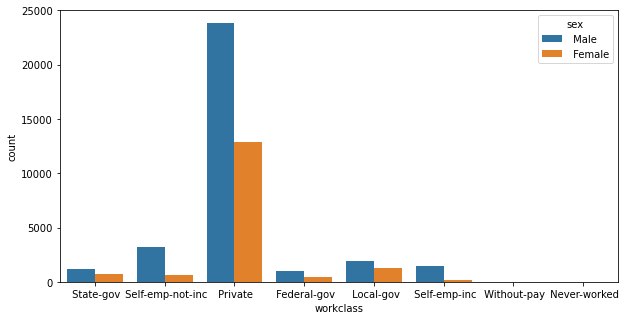

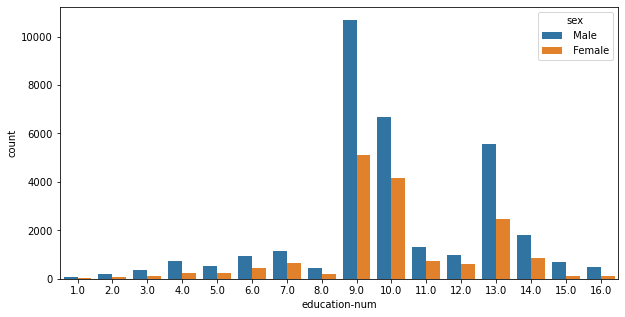

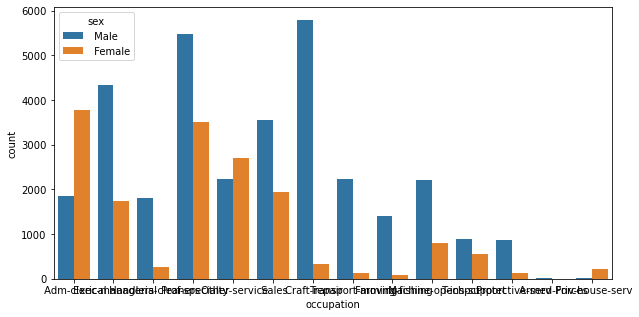

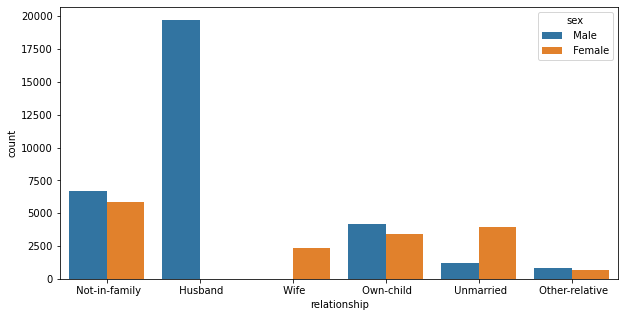

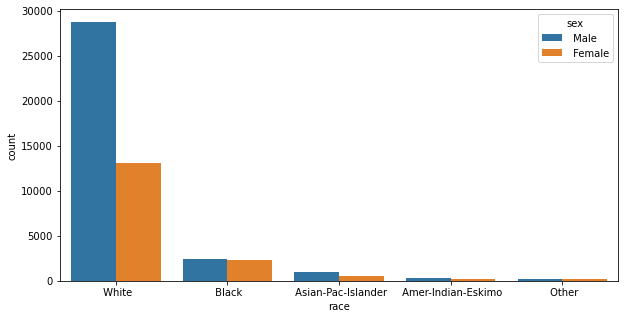

In [72]:
s = ['workclass','education-num','occupation','relationship','race']
for i in s:
    sns.countplot(data = df, x = i , hue ='sex')
    plt.show()
# workclass - private (male)
# education - HS-grad -> Some-collage -> Bachelors
# Occupation - male -> Craft-repair , female -> Adm-clerical , mixed -> Prof-specialty
# race - White(mainly) -> Black
# Country - USA (mainly)

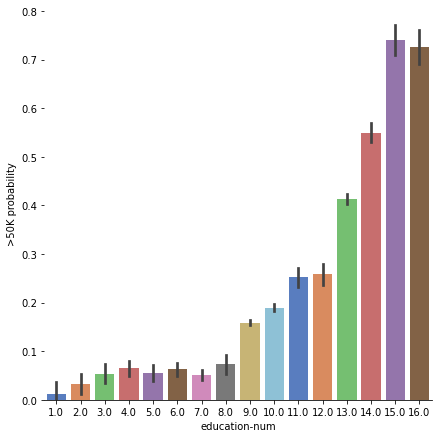

In [73]:
# Explore education_num vs Income
g = sns.factorplot(x="education-num",y="target",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

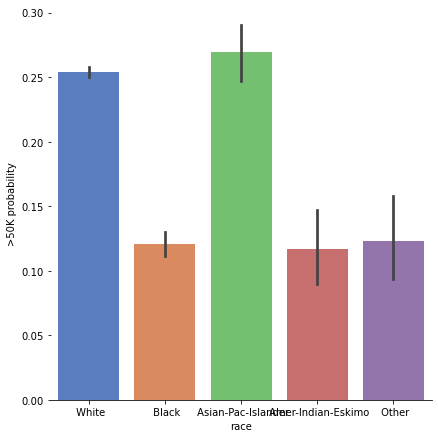

In [74]:
# Explore race vs Income
g = sns.factorplot(x="race",y="target",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

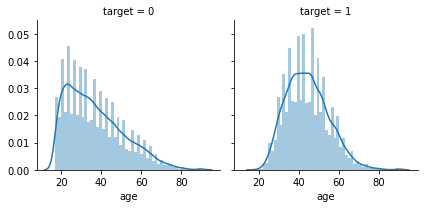

In [75]:
# Explore Age vs income
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "age")
plt.show()

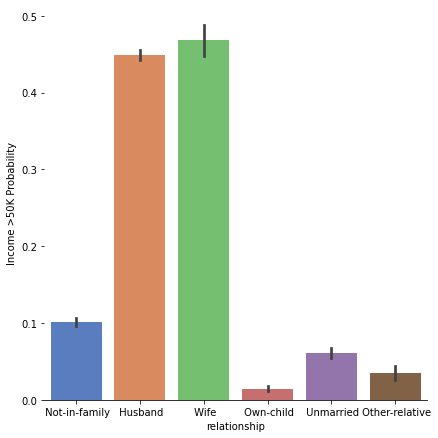

In [76]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="target",data=df,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

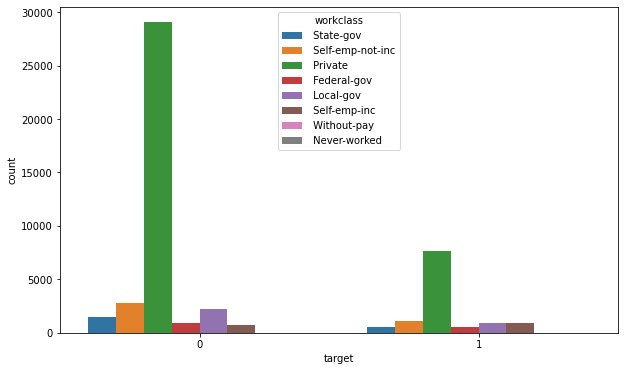

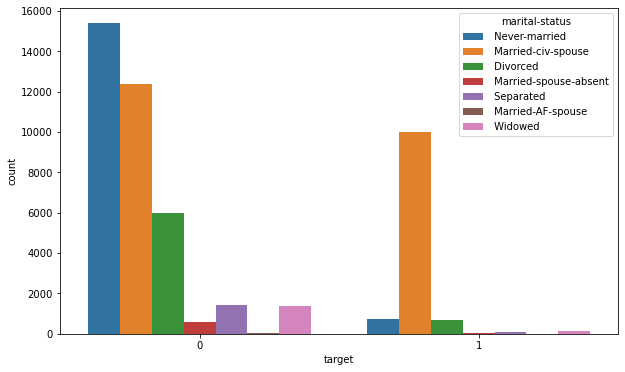

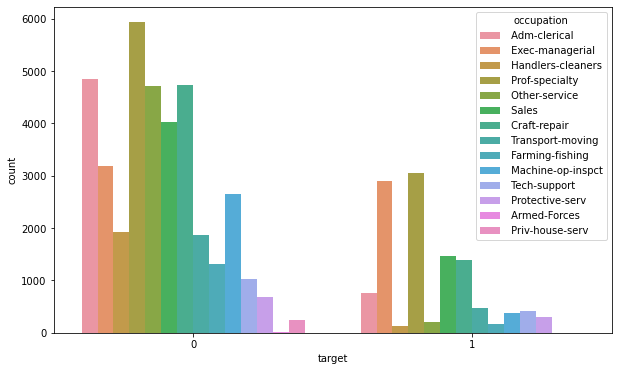

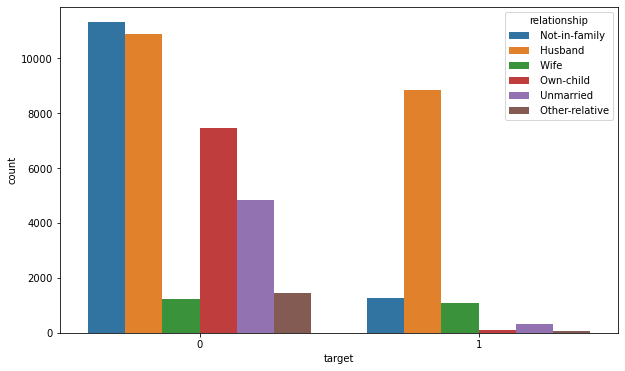

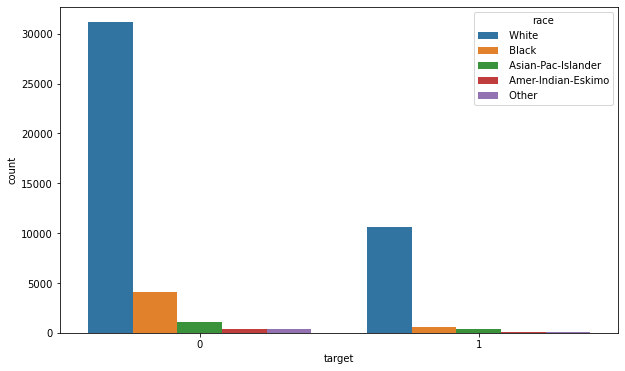

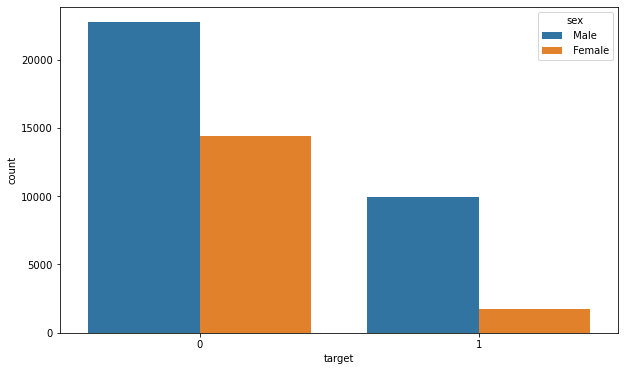

In [77]:
for col in df[['workclass','marital-status','occupation','relationship','race','sex']]:
    fig, axes = plt.subplots(figsize = (10,6))
    sns.countplot(data = df, x = "target", hue = col)
    plt.show()

In [78]:
df['native-country'].value_counts()
# native-country is mainly United-States

 United-States                 44689
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

In [79]:
# encode for categorical features
df = pd.get_dummies(df,drop_first=True)

In [80]:
df.head()

,age,education-num,hours-per-week,target,capital_change,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,13.0,40.0,0,2174.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,13.0,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,40.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,40.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,40.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16281
Data columns (total 81 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         48842 non-null  float64
 1   education-num                               48842 non-null  float64
 2   hours-per-week                              48842 non-null  float64
 3   target                                      48842 non-null  int64  
 4   capital_change                              48842 non-null  float64
 5   workclass_ Local-gov                        48842 non-null  uint8  
 6   workclass_ Never-worked                     48842 non-null  uint8  
 7   workclass_ Private                          48842 non-null  uint8  
 8   workclass_ Self-emp-inc                     48842 non-null  uint8  
 9   workclass_ Self-emp-not-inc                 48842 non-null  uint8  
 10  workclass_

In [82]:
# target and features setting
X = df.drop(['target'],axis=1)
y = df['target']

In [83]:
X

,age,education-num,hours-per-week,capital_change,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,13.0,40.0,2174.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,13.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39.0,13.0,36.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,64.0,9.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,38.0,13.0,50.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16280,44.0,13.0,40.0,5455.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
16277    0
16278    0
16279    0
16280    0
16281    1
Name: target, Length: 48842, dtype: int64

In [85]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16277    0
16278    0
16279    0
16280    0
16281    1
Name: target, Length: 48842, dtype: int64

In [86]:
# splitting data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
###
# you can try your models start from here
###

In [87]:
# transformation and scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#END